In [ ]:
import pandas as pd
from google.colab import drive 
drive.mount('/content/MyGoogleDrive')

Mounted at /content/MyGoogleDrive


<ipython-input-3-b9a75d1d71a7>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Shoe size_cm'] = df['Shoe size_cm'].astype(int)
<ipython-input-3-b9a75d1d71a7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'BMI'] = df['Weight_kg'] / ((df['Height_cm'] / 100.0) * (df['Height_cm'] / 100.0))
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/us

v1預測結果為： [2]
v2預測結果為： [1]


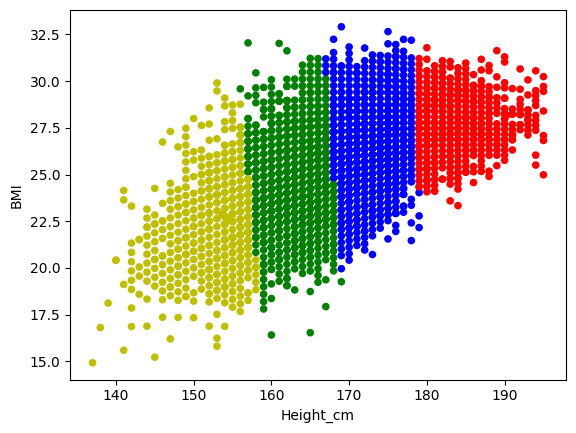

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

def load_data():
  # 讀取鞋子資料集，刪除ID欄位和重複資料
  df = pd.read_csv('/content/MyGoogleDrive/MyDrive/Colab Notebooks/ShoeSize.csv').drop('ID', axis=1).drop_duplicates()  
  # 將Gender的字串換成數值
  s = {'Female':0, 'Male':1}
  df['Gender'] = df['Gender'].map(s)
  return df

def fill_missing_values(df):
  # 將Height_cm缺失值補上相對應Gender、Weight_kg和Shoe size_cm的平均身高
  df['Height_cm'] = df.groupby(['Gender', 'Weight_kg', 'Shoe size_cm'])['Height_cm'].transform(lambda x: x.fillna(x.mean()))
  # 將Weight_kg缺失值補上相對應Gender、Height_cm和Shoe size_cm的平均體重
  df['Weight_kg'] = df.groupby(['Gender', 'Height_cm', 'Shoe size_cm'])['Weight_kg'].transform(lambda x: x.fillna(x.mean()))
  # 刪除缺失值
  df = df.dropna(axis=0)
  # Shoe size_cm的float轉換成int
  df.loc[:, 'Shoe size_cm'] = df['Shoe size_cm'].astype(int)
  # 新增bmi欄位
  df.loc[:, 'BMI'] = df['Weight_kg'] / ((df['Height_cm'] / 100.0) * (df['Height_cm'] / 100.0))
  # 列索引重新編號
  df = df.reset_index(drop=True)
  return df

def cluster_data(df):
  # 依照Gender、Height_cm、BMI進行分群
  df_X = df[['Gender', 'Height_cm', 'BMI']].copy()
  # 訓練模型並預測分群
  kmeans = KMeans(n_clusters=4, n_init=10).fit(df_X)
  pred = kmeans.predict(df_X)
  # 將分群結果新增至DataFrame
  df1 = pd.DataFrame(df_X, columns=df_X.columns)
  df1['cluster'] = pred
  return df1, kmeans

def plot_cluster(df):
  # 以不同顏色繪製分群結果的散佈圖
  c = {0: 'r', 1:'g', 2:'b', 3:'y'}
  df['colors'] = df['cluster'].map(c)
  df.plot(kind='scatter', x='Height_cm', y='BMI', c=df['colors'])

def predict_new_data(kmeans):
  # 預測新的資料所屬的分群
  new1 = [[1, 178, 24.85]]
  new2 = [[0, 162, 20.19]]
  v1 = kmeans.predict(new1)
  v2 = kmeans.predict(new2)
  print('v1預測結果為：', v1)
  print('v2預測結果為：', v2)

# 讀取資料集
df = load_data()

# 補足缺失值、新增bmi欄位、分群
df1, kmeans = cluster_data(fill_missing_values(df))

# 繪製分群結果散佈圖
plot_cluster(df1)

# 預測新的資料所屬的分群
predict_new_data(kmeans)
